In [1]:
# Basic Libraries 📚
# --------------------------------------
import numpy as np
import pandas as pd


# Plot library 📊
# --------------------------------------
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio


# NLP
# --------------------------------------
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import Word, TextBlob
from wordcloud import WordCloud  # visualization of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Metrics 📐
# --------------------------------------
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder


# Machine Learning Models 🤖
# --------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Customize to Remove Warnings and Better Observation 🔧
# --------------------------------------------------------
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [3]:
df=pd.read_excel("amazon.xlsx")

In [5]:
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [7]:
df.isnull().sum()

,0
Star,0
HelpFul,0
Title,52
Review,18


In [8]:
df.dropna(subset=['Review'], inplace=True)
df.isnull().sum()

,0
Star,0
HelpFul,0
Title,43
Review,0


In [12]:
#this method is apply on the dataset to make the each letter lowercase
#method -> str.lower()
df['Review']=df['Review'].str.lower()

In [11]:
#this method is called regular expression removing the puncuation with spaces
#method->str.replace("pattern" ,with_space)
df['Review']=df["Review"].str.replace("['[^\w\s]]"  ,' ')

In [14]:
#for remove the nmuber or the digits
df["Review"]=df["Review"].str.replace("\d" ," ")

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
#total stopword like the and the is will they and remove
sw=stopwords.words('english')

In [17]:
"""The process:

apply allows function navigation, then let's write an apply function with lambda.
Let's go through the reviews, split each line to get all the words one by one.
After splitting, let's look at each word one by one (for example, with the help of the list comprehension), then, take the words that are not in stopwords, and join these words.
"""

df["Review"]=df['Review'].apply(lambda x:" ".join(x for x in str(x).split() if x not in sw))

In [20]:
temp_df=pd.Series(' '.join(df['Review']).split()).value_counts()

In [21]:
temp_df

,count
love,1271
curtains,1251
like,1017
look,818
great,721
...,...
"merchandise,",1
description!!,1
wfh,1
crisp.<br,1


In [22]:
drops=temp_df[temp_df<=1]

In [23]:
df["Review"]=df["Review"].apply(lambda x:  " ".join(x for x in x.split() if x not in drops))

In [24]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [26]:
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [28]:
tf=df['Review'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [29]:
tf.head()

,index,0
0,happy,171.00
1,good,453.00
2,quality,609.00
3,material,398.00
4,however,36.00


In [31]:
tf.columns=['words' ,'tf']

In [32]:
tf.sort_values('tf' ,ascending=False)

,words,tf
46,curtain,1773.00
35,look,1459.00
116,love,1412.00
164,like,1033.00
22,great,721.00
...,...,...
3878,rustic.,2.00
3879,diy,2.00
3880,fantasy,2.00
3881,sloth,2.00


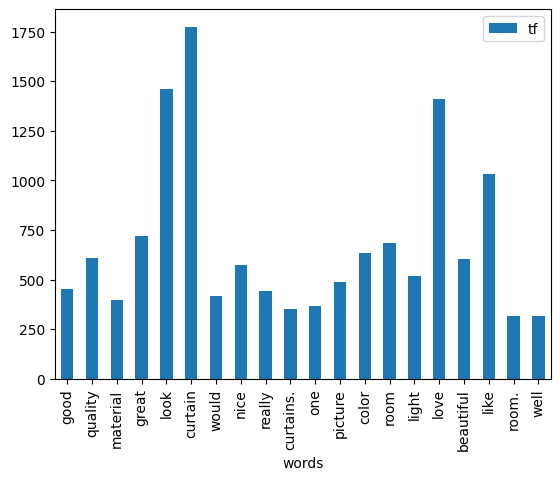

In [33]:
tf[tf['tf']>300].plot.bar(x="words" ,y='tf')
plt.show()

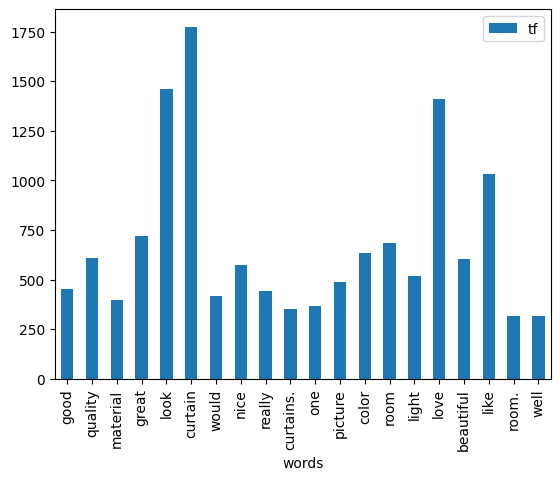

In [37]:
tf[tf["tf"]>300].plot.bar(x="words" , y="tf")
plt.show()

In [38]:
text=" ".join(i for i in df.Review)

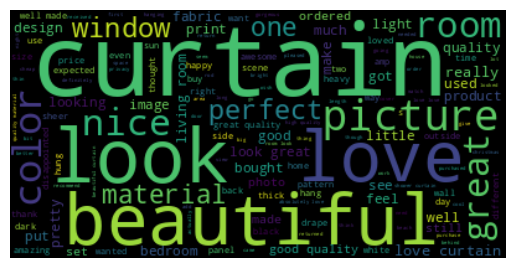

In [40]:
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis("off")
plt.show()

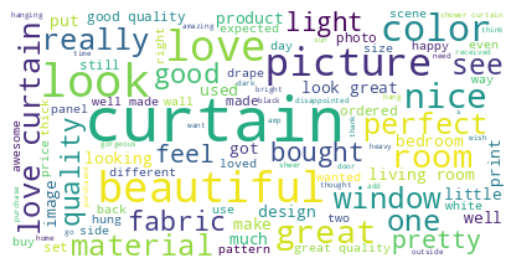

In [43]:
wordcloud=WordCloud(max_font_size=50 , max_words=100 , background_color='white').generate(text)
plt.figure()
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis("off")
plt.show()

In [44]:
df["Review"].head()

,Review
0,happy
1,good quality material however panel
2,"product fun bedroom windows.<br bit stretched,..."
3,lo que e que un poco ma
4,great bang can't believe quality material. vib...


In [46]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [48]:
sns=SentimentIntensityAnalyzer()
sns.polarity_scores("this film is awesome")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [49]:
sns.polarity_scores("I liked this music but it is not good as the other one")


{'neg': 0.207, 'neu': 0.666, 'pos': 0.127, 'compound': -0.298}

In [50]:
df["Review"][0:10].apply(lambda x:sns.polarity_scores(x))

,Review
0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
1,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou..."
2,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp..."
3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,"{'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'comp..."
5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,"{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp..."
7,"{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'comp..."
8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp..."


In [51]:
#take only compound score
df['Review'][0:10].apply(lambda x:sns.polarity_scores(x)['compound'])

,Review
0,0.57
1,0.44
2,0.72
3,0.00
4,0.90
5,0.00
6,0.62
7,0.93
8,0.00
9,0.71


In [52]:
df['polarity_score']=df['Review'].apply(lambda x:sns.polarity_scores(x)["compound"])

In [54]:
df['polarity_score'].head(2)

,polarity_score
0,0.57
1,0.44


In [56]:
df["Review"][0:10].apply(lambda x:"pos" if sns.polarity_scores(x)['compound']>0 else "neg")

,Review
0,pos
1,pos
2,pos
3,neg
4,pos
5,neg
6,pos
7,pos
8,neg
9,pos


In [59]:
rev_pol=pd.concat([df['Review'][0:10] ,df["Review"][0:10].apply(lambda x: "pos" if sns.polarity_scores(x)["compound"]> 0 else "neg")], axis=1)
rev_pol.columns=["review" , "polarity_Score"]

In [64]:
df["sentiment_label"] = df["Review"].apply(lambda x: "pos" if sns.polarity_scores(x)["compound"] > 0 else "neg")
df["sentiment_label"].value_counts()


,count
sentiment_label,
pos,4786
neg,807


In [65]:
df.groupby("sentiment_label")["Star"].mean()

,Star
sentiment_label,
neg,3.50
pos,4.56


In [66]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])
y = df["sentiment_label"]
X = df["Review"]


In [67]:
print(" X ".center(50, "~"))
display(X.head())
print("")
print(" Y ".center(50, "~"))
display(y.head())


~~~~~~~~~~~~~~~~~~~~~~~ X ~~~~~~~~~~~~~~~~~~~~~~~~


,Review
0,happy
1,good quality material however panel
2,"product fun bedroom windows.<br bit stretched,..."
3,lo que e que un poco ma
4,great bang can't believe quality material. vib...



~~~~~~~~~~~~~~~~~~~~~~~ Y ~~~~~~~~~~~~~~~~~~~~~~~~


,sentiment_label
0,1
1,1
2,1
3,0
4,1


#### vectorization

In [68]:
# word
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)
# ngram
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)

In [69]:
log_model = LogisticRegression().fit(X_tf_idf_word, y)
cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring="accuracy",
                cv=5).mean()

np.float64(0.8980876741148579)

In [70]:
new_review = pd.Series("this product is great")

In [71]:
new_review = TfidfVectorizer().fit(X).transform(new_review)

# predict the sentiment of review
log_model.predict(new_review)

array([1])

In [72]:
sample = df["Review"].sample(1).values
print(sample)
random_review = pd.Series(sample)
new_review = TfidfVectorizer().fit(X).transform(random_review)
log_model.predict(new_review)

['wanted drape span length bar family room. right length, needed decided fold half make top, slide onto curtain rod. that, able wood pattern visible front back. able without make really happy drape good quality white fabric sheer. happy purchase.']


array([1])

In [75]:
vectorizer = CountVectorizer()  # default => word count
X_count = vectorizer.fit_transform(X)

In [76]:
rf_model = RandomForestClassifier().fit(X_count, y)
print("Count Vectors Score", cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean())

# TF-IDF Word-Level
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
print("TF-IDF Word-Level Score", cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean())

# TF-IDF N-Gram
rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
print("TF-IDF N-Gram Score", cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean())

%%time
def score(method_list):
    scores = []
    for method in method_list:
        rf_model = RandomForestClassifier().fit(method, y)
        scores.append(cross_val_score(rf_model, method, y, cv=5, n_jobs=-1).mean())

    scores_df = pd.DataFrame({"Methods": ["Count Vectors", "TF-IDF Word-Level", "TF-IDF N-Gram"],
                             "Scores": scores})

    trace1 = go.Bar(
                    y = scores_df["Methods"],
                    x = scores_df["Scores"],
                    name = "Accuracy Plot",
                    text=[round(i,5) for i in scores_df['Scores']],
                    marker = dict(color = ['#2ECC71','#34495E','#D0D3D4'],
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
        orientation='h', textposition = 'inside'
    )
    data = [trace1]
    layout = go.Layout(barmode = "group",
                       title={'text': "Scores" ,
                                 'y':0.9,
                                 'x':0.5,
                                 'xanchor': 'center',
                                 'yanchor': 'top'},
                          template='plotly_white')
    fig = go.Figure(data = data, layout = layout)
    pio.show(fig)

method_list = [X_count, X_tf_idf_word, X_tf_idf_ngram]
score(method_list)


rf_params = {"max_depth": [8, None],
             "max_features": [7, "auto"],
             "min_samples_split": [2, 5, 8],
             "n_estimators": [100, 200]
             }

rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=1).fit(X_count, y)


Count Vectors Score 0.9343831781826669
TF-IDF Word-Level Score 0.9241907146202927
TF-IDF N-Gram Score 0.8608978755309575


UsageError: Line magic function `%%time` not found.
